In [1]:
import numpy as np
import os

import matplotlib.pyplot as plt
%matplotlib inline

from IPython import display

# Interactive Tools
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual, FloatSlider

np.set_printoptions(precision=4, suppress=True)

In [2]:
from vae.arch_surprise_final import VAE
vae = VAE()
vae.set_weights('./vae/weight/best/arch_surprise_final.h5') #arch_surprise

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.


In [3]:
EPISODE_NB = 5 # 5 for non-prioritised

DIR_NAME = './data/vae_food_3/'
file = os.listdir(DIR_NAME)[EPISODE_NB]
print(file)

observations = np.load(DIR_NAME + file)['obs']
print(observations.shape)
size = observations.shape[0]

1000765185.npz
(1445, 64, 64, 3)


In [5]:
def animate_episode(observations):
    frames = vae.full_model.predict(observations)
    size = len(frames)
    
    for idx in range(size):
        plt.gca().cla() # clear axis

        plt.subplot(121)
        plt.imshow(observations[idx])
        plt.subplot(122)
        plt.imshow(frames[idx])

        display.clear_output(wait=True)
        display.display(plt.gcf()) 

KeyboardInterrupt: 

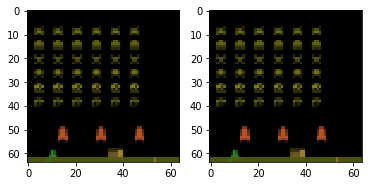

In [43]:
animate_episode(observations)

In [4]:
def slider_animation(observations):
    frames = vae.full_model.predict(observations)
    size = len(frames)

    @interact
    def animate(idx=(0, size - 1, 1)):
        f, axarr = plt.subplots(1, 2, figsize=(10,5))
        axarr[0].axis('off')
        axarr[1].axis('off')
        
#         plt.subplot(121)
        axarr[0].imshow(observations[idx])
#         plt.subplot(122)
        axarr[1].imshow(frames[idx])
    
    return animate

In [5]:
# arch, valid_racer_layer4, vae_food: 273: bottom bullet yes
# arch, valid_racer_layer4, vae_food: 406: middle top nope
# arch, valid_racer_layer4, vae_food: 361: top nope
# arch_extreme, arch_extreme.h5, vae_food, 381: extreme!
# arch_prioritised
# arch2, same3layer5.h5, vae_food, 485
slider_animation(observations);

interactive(children=(IntSlider(value=722, description='idx', max=1444), Output()), _dom_classes=('widget-inte…

In [6]:
def display(img, title=''):
    plt.figure()
    plt.title(f'{title} {img.shape}')
    plt.axis('off')
    
    if img.ndim == 2:
        plt.imshow(img, cmap='gray')
    else:
        plt.imshow(img)

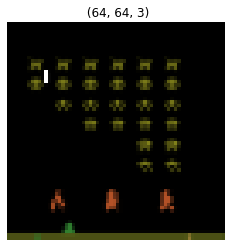

In [11]:
display(observations[672])

# Visualise Mean and Variance Vectors

In [7]:
'''
Inspect the values of mu (mean) and log_var (log variance) produced by an
encoder from a speicific observation
'''

mu_lv = vae.encoder_mu_log_var.predict(np.array([observations[200]])) # 200th observation

mu      = mu_lv[0][0]
log_var = mu_lv[1][0]

print('--- mu ---')
print(mu)
print()
print('--- log_var ---')
print(log_var)

--- mu ---
[-0.9026 -1.4371 -0.0356 -0.8527 -0.1048 -1.0876  0.4404 -0.3933  0.8393
 -1.1629 -1.5236 -0.3428 -0.9105  0.1974 -0.8522  0.5427  0.1373 -1.3896
  0.0437 -0.4971  1.0184  0.2937  0.1657 -0.2403 -0.6656 -1.2794 -1.2182
  1.3197 -0.7962 -1.2917 -1.7874 -0.1043 -0.6298 -1.349   1.2932  0.9336
 -1.9717 -0.151   0.7805 -1.51   -1.2218  0.8162  0.7725 -1.6105 -0.5582
  0.5739 -0.5387 -0.8666 -0.8202 -0.1988  0.4374 -0.4614 -0.6385  1.3918
  0.7378 -0.3413 -1.0241 -0.9592  0.7112 -0.5185 -1.0056 -1.3115 -0.9162
  0.1866]

--- log_var ---
[-20.9931 -23.8373 -21.3822 -15.2742 -20.8304 -22.8642 -23.0294 -22.8184
 -24.6629 -22.8055 -25.538  -23.7721 -24.38   -25.7529 -21.9963 -25.8763
 -22.4079 -23.1249 -24.6879 -24.6649 -22.3504 -19.6551 -23.3753 -22.5984
 -24.2152 -23.1054 -23.3386 -22.2774 -20.7668 -19.3794 -23.9558 -25.1505
 -24.2861 -20.8019 -20.9529 -24.2134 -26.3067 -20.0739 -26.2683 -25.8964
 -23.6847 -22.0795 -20.5672 -22.7487 -15.9174 -27.1908 -18.6679 -22.5664
 -23.2047 -22

In [8]:
'''
Find indices of highest variance
'''
indices = np.argsort(-log_var)
print(indices.tolist())

[3, 44, 46, 29, 21, 52, 37, 61, 58, 42, 28, 33, 4, 34, 62, 0, 2, 54, 50, 53, 57, 14, 41, 27, 20, 16, 59, 47, 23, 49, 43, 9, 7, 5, 6, 25, 17, 48, 26, 22, 56, 51, 40, 11, 1, 30, 35, 24, 32, 12, 63, 60, 8, 19, 18, 55, 31, 10, 13, 15, 39, 38, 36, 45]


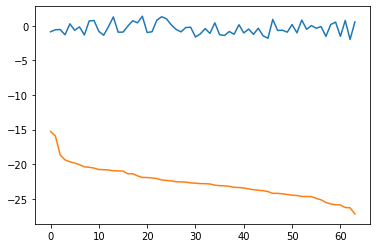

In [9]:
'''
Visualise differences in mean and variance across different latent variables
'''
plt.plot(mu[indices]); # BLUE
plt.plot(log_var[indices]); # ORANGE

In [6]:
# encoded_mu_log_var = vae.encoder_mu_log_var.predict(np.array([obs]))
# mu = encoded_mu_log_var[0][0]
# log_var = encoded_mu_log_var[1][0]

# lv = np.abs(log_var.copy())
# indices = np.argsort(lv)[-8:]
# print(indices)

def create_z_slider(frame_nb=100):
    obs = observations[frame_nb]
    sample = vae.encoder.predict(np.array([obs]))[0]
    log_var = vae.encoder_mu_log_var.predict(np.array([obs]))[1][0]

    indices = np.argsort(-log_var)[:8]
    print('Most significant components:', indices)
    c = (-5, 5, 0.5) # large step size to reduce lag on the slider

    @interact
    def z_slider(z0=c, z1=c, z2=c, z3=c, z4=c, z5=c, z6=c, z7=c): 
        
        z = sample.copy()
        
        z[indices[0]] = z0
        z[indices[1]] = z1
        z[indices[2]] = z2
        z[indices[3]] = z3
        z[indices[4]] = z4
        z[indices[5]] = z5
        z[indices[6]] = z6
        z[indices[7]] = z7
        
        image = vae.decoder.predict(np.array([z]))[0]
        plt.gca().cla()
        plt.imshow(image)
        
    return z_slider

In [7]:
create_z_slider();

Most significant components: [36  2 44 45 33 48 47 59]


interactive(children=(FloatSlider(value=0.0, description='z0', max=5.0, min=-5.0, step=0.5), FloatSlider(value…